In [1]:
# Import packages and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays


In [2]:

df = pd.read_csv('/Users/afnanalamri/Renewable_Energy/raw_data/powerconsumption.csv')

df.head()


,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


# Handle Missings

In [3]:
# start with first comment at kaggle:
# https://www.kaggle.com/code/damlapeker/prediction-of-electric-power-consumption

def detailed_check_df(dataframe, head=5):
    print("Shape:")
    print(dataframe.shape)

    print("Info:")
    # what is memory_usage attribute?
    # If we have large strings, we can convert them to other types, such as categories, to save space.
    print(dataframe.info(memory_usage='deep'))

    print("Types:")
    print(dataframe.dtypes)

    print("Missing Values:")
    missing_values = dataframe.isnull().sum()
    print(missing_values[missing_values > 0])

    print("Unique Values:")
    for column in dataframe.columns:
        print(f"{column} has {dataframe[column].nunique()} unique values")

detailed_check_df(df)

Shape:
(52416, 9)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 6.8 MB
None
Types:
Datetime                   object
Temperature               float64
Humidity                  float64
WindSpeed                 float64
GeneralDiffuseFlows       float64
DiffuseFlows              float64
PowerConsumption_Z

In [4]:
df.isna().sum()


Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [5]:
df.dtypes

Datetime                   object
Temperature               float64
Humidity                  float64
WindSpeed                 float64
GeneralDiffuseFlows       float64
DiffuseFlows              float64
PowerConsumption_Zone1    float64
PowerConsumption_Zone2    float64
PowerConsumption_Zone3    float64
dtype: object

# DateTime index

In [6]:

# df.reset_index(drop=True, inplace=True)

df['Datetime'] = pd.to_datetime(df['Datetime'],format='%m/%d/%Y %H:%M')
df['Date'] = df['Datetime'].dt.date

df.set_index('Datetime', inplace=True)

df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Date
Datetime,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017-01-01
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017-01-01
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017-01-01
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017-01-01
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017-01-01


In [7]:
df['TotalPowerConsumption'] = df['PowerConsumption_Zone1'] + df['PowerConsumption_Zone2'] + df['PowerConsumption_Zone3']

df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Date,TotalPowerConsumption
Datetime,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017-01-01,70425.53544
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017-01-01,69320.84387
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017-01-01,67803.22193
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017-01-01,65489.23209
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017-01-01,63650.44627


In [8]:
df.drop(columns=['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'], inplace=True)
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,Date,TotalPowerConsumption
Datetime,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,2017-01-01,70425.53544
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,2017-01-01,69320.84387
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,2017-01-01,67803.22193
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,2017-01-01,65489.23209
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,2017-01-01,63650.44627


# Average Income

In [9]:
AverageIncome_2017= 3288.50
AverageIncome_2024= 3489
# https://ycharts.com/indicators/morocco_gdp_per_capita_usd

df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,Date,TotalPowerConsumption
Datetime,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,2017-01-01,70425.53544
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,2017-01-01,69320.84387
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,2017-01-01,67803.22193
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,2017-01-01,65489.23209
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,2017-01-01,63650.44627


In [10]:
total_individuals = 399817
# df['PerCapitaConsumption'] = df['TotalPowerConsumption'] / total_individuals
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,Date,TotalPowerConsumption
Datetime,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,2017-01-01,70425.53544
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,2017-01-01,69320.84387
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,2017-01-01,67803.22193
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,2017-01-01,65489.23209
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,2017-01-01,63650.44627


# Visualize relationships

In [11]:
# Calculate the correlation coefficient between individual consumption and each of the five factors.
correlation_temp = df['TotalPowerConsumption'].corr(df['Temperature'])
correlation_humidity = df['TotalPowerConsumption'].corr(df['Humidity'])
correlation_wind_speed = df['TotalPowerConsumption'].corr(df['WindSpeed'])
correlation_general_diffuse = df['TotalPowerConsumption'].corr(df['GeneralDiffuseFlows'])
correlation_diffuse = df['TotalPowerConsumption'].corr(df['DiffuseFlows'])

# print the results
print("Correlation with Temperature:", correlation_temp)
print("Correlation with Humidity:", correlation_humidity)
print("Correlation with Wind Speed:", correlation_wind_speed)
print("Correlation with General Diffuse Flows:", correlation_general_diffuse)
print("Correlation with Diffuse Flows:", correlation_diffuse)


Correlation with Temperature: 0.4882384320045328
Correlation with Humidity: -0.29905902107542187
Correlation with Wind Speed: 0.2217061054966012
Correlation with General Diffuse Flows: 0.15036752624197006
Correlation with Diffuse Flows: 0.03206764678074169


# Add IsHoliday column

### Insert the 2017 Moroccan Holiday Dataset


In [12]:

# Assuming df is your DataFrame and Datetime is the index
df.index = pd.to_datetime(df.index)  # Ensure the index is in datetime format
df['Date'] = df.index.date  # Extract date from index and create a Date column

# Initialize the Morocco holidays for the year 2017
morocco_holidays = holidays.Morocco(years=[2017])

# Add the 'IsHoliday' column
df['IsHoliday'] = df['Date'].apply(lambda x: 1 if x in morocco_holidays else 0)

# Display the result
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,Date,TotalPowerConsumption,IsHoliday
Datetime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,2017-01-01,70425.53544,1
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,2017-01-01,69320.84387,1
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,2017-01-01,67803.22193,1
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,2017-01-01,65489.23209,1
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,2017-01-01,63650.44627,1


## Morocco holidays for 2017

### To ensure accuracy, this is list all holidays for Morocco in 2017 generated by the holidays library.

In [13]:
# Initialize the Morocco holidays for 2017
morocco_holidays = holidays.Morocco(years=[2017])

# Print all holidays in Morocco for 2017
for date, name in sorted(morocco_holidays.items()):
    print(date, name)


2017-01-01 رأس السنة الميلادية
2017-01-11 ذكرى تقديم وثيقة الاستقلال
2017-05-01 عيد العمال
2017-06-25 (تقدير) عيد الفطر
2017-06-26 (تقدير) عيد الفطر
2017-07-30 عيد العرش
2017-08-14 ذكرى استرجاع إقليم وادي الذهب
2017-08-20 ذكرى ثورة الملك و الشعب
2017-08-21 عيد الشباب
2017-09-01 (تقدير) عيد الأضحى
2017-09-02 (تقدير) عيد الأضحى
2017-09-21 (تقدير) رأس السنة الهجرية
2017-11-06 ذكرى المسيرة الخضراء
2017-11-18 عيد الإستقلال
2017-11-30 (تقدير) عيد المولد النبوي
2017-12-01 (تقدير) عيد المولد النبوي


# Exploratory Data Analysis 📊

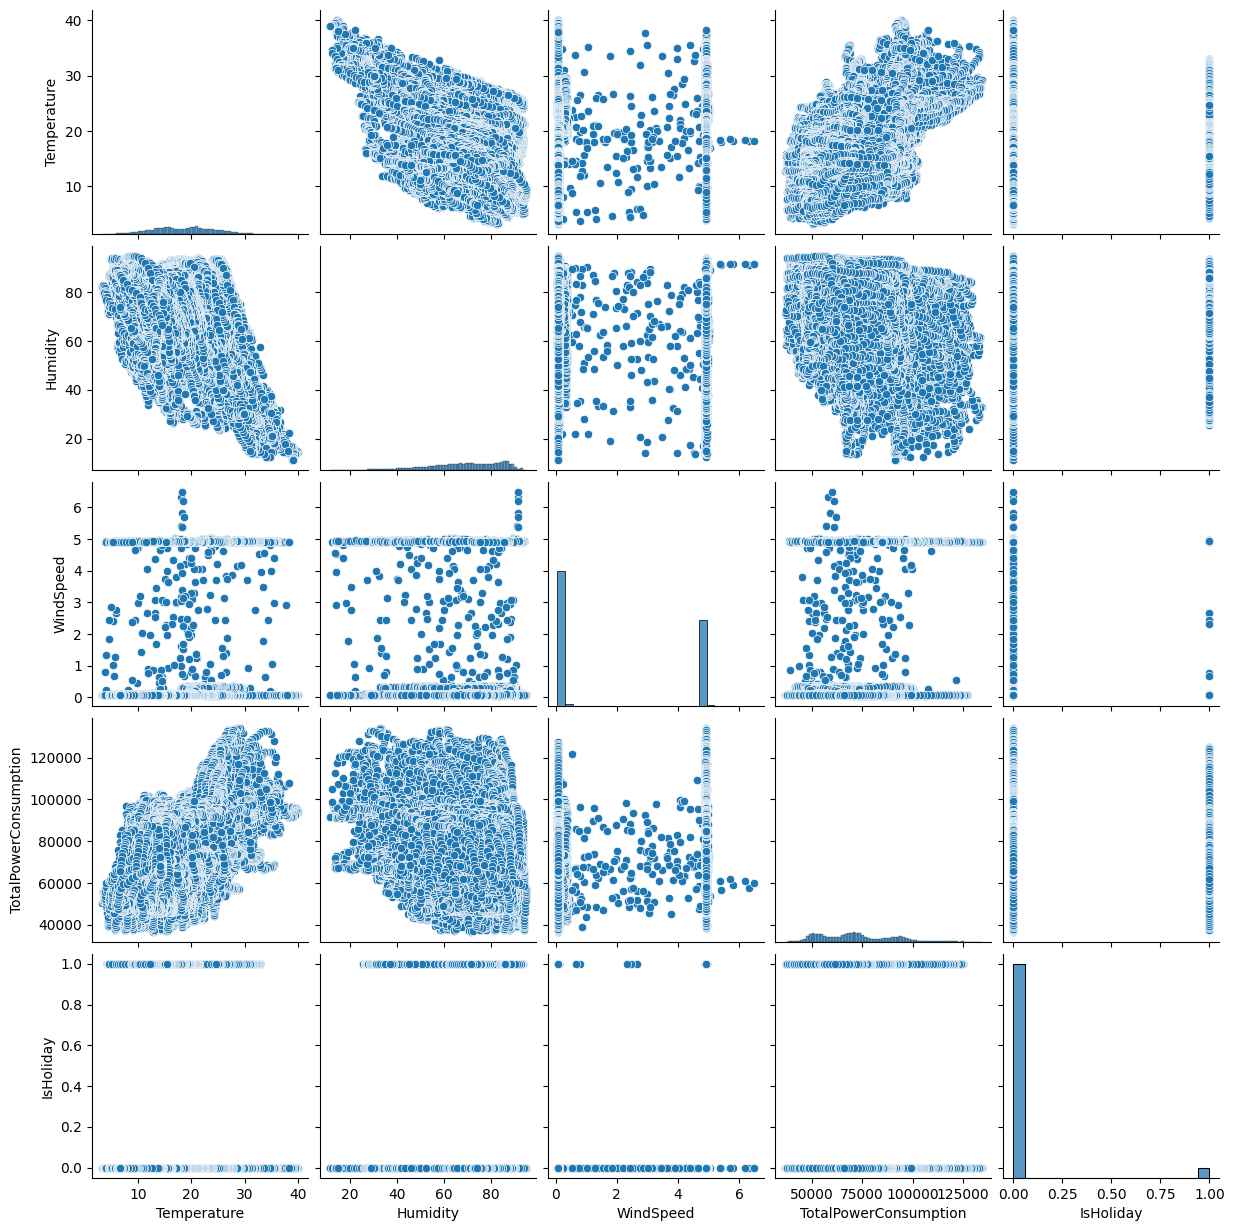

In [14]:
#Data Visualization
# Pairplot to visualize relationships between numerical columns
sns.pairplot(df[['Temperature', 'Humidity', 'WindSpeed', 'TotalPowerConsumption', 'IsHoliday']])
plt.show()

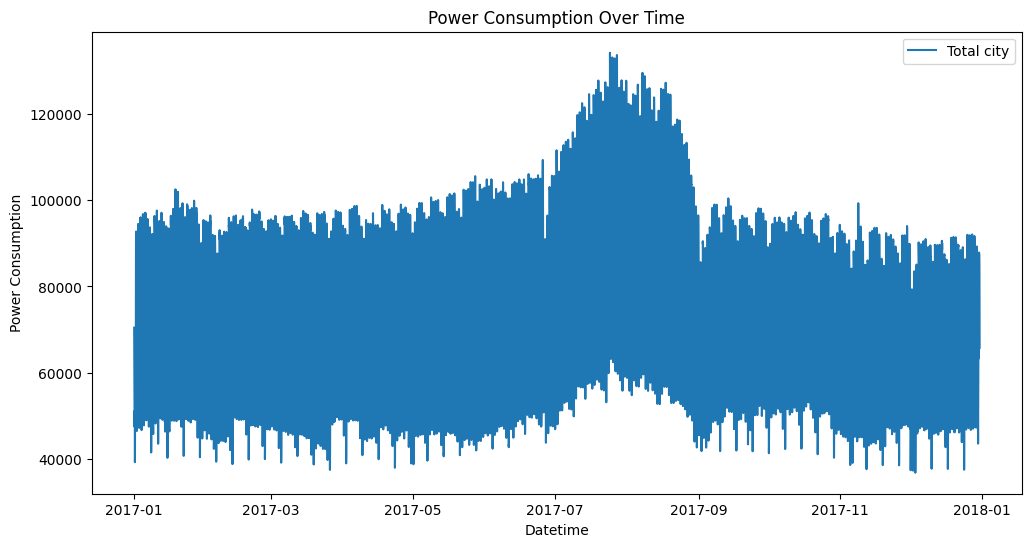

In [15]:
# Time series plot for PowerConsumption
plt.figure(figsize=(12, 6))
sns.lineplot(x='Datetime', y='TotalPowerConsumption', data=df, label='Total city')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Over Time')
plt.show()
# نشيله

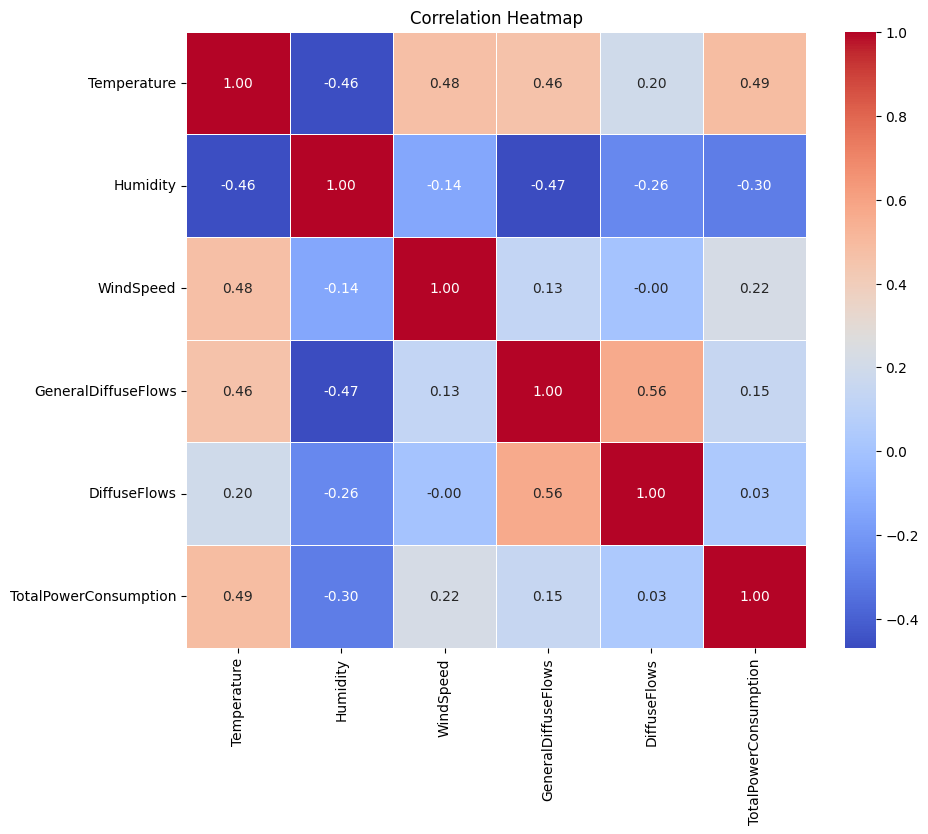

In [16]:
# Calculate correlation matrix
correlation_matrix = df[['Temperature', 'Humidity', 'WindSpeed','GeneralDiffuseFlows', 'DiffuseFlows' , 'TotalPowerConsumption']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Daily resample

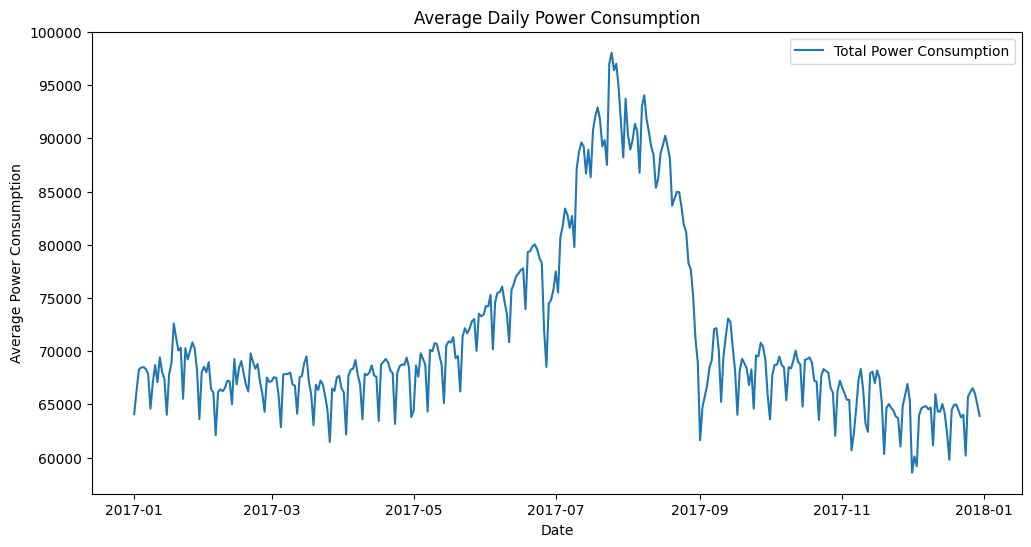

In [17]:

# Resample the 'TotalPowerConsumption' column to daily frequency and calculate the mean
daily_resampled = df['TotalPowerConsumption'].resample('D').mean()

# Plot daily Total Power Consumption
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_resampled)
plt.xlabel('Date')
plt.ylabel('Average Power Consumption')
plt.title('Average Daily Power Consumption')
plt.legend(labels=['Total Power Consumption'])
plt.show()


In [18]:
# Create new columns using the Datetime index
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Hour'] = df.index.hour


In [19]:
# Define time of day categories
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Categorize the time of day using the 'Hour' column
df['TimeOfDay'] = df['Hour'].apply(categorize_time_of_day)

# Add day of the week and check if it is a weekend
df['Weekday'] = df.index.weekday  # Access weekday from index
# Add a column to indicate if it's a weekend
df['IsWeekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)


In [20]:

# Define the seasons
def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(categorize_season)

# Let's set the data types to numeric
df['Year'] = df['Year'].astype(int)
df['Weekday'] = df['Weekday'].astype(int)
df['IsWeekend'] = df['IsWeekend'].astype(int)


In [21]:
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,Date,TotalPowerConsumption,IsHoliday,Year,Month,Day,Hour,TimeOfDay,Weekday,IsWeekend,Season
Datetime,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,2017-01-01,70425.53544,1,2017,1,1,0,Night,6,1,Winter
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,2017-01-01,69320.84387,1,2017,1,1,0,Night,6,1,Winter
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,2017-01-01,67803.22193,1,2017,1,1,0,Night,6,1,Winter
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,2017-01-01,65489.23209,1,2017,1,1,0,Night,6,1,Winter
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,2017-01-01,63650.44627,1,2017,1,1,0,Night,6,1,Winter


### ENCODING -OneHotIncoder


In [22]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# Fit the encoder on the relevant columns
ohe.fit(df[['Season', 'TimeOfDay']])

# Apply transformation and create new columns
df[ohe.get_feature_names_out(['Season', 'TimeOfDay'])] = ohe.transform(df[['Season', 'TimeOfDay']])

# Drop the columns "Season, TimeOfDay" which has been encoded
df = df.drop(columns = ['Season', 'TimeOfDay'])

### Per Capita Consumption


In [23]:
df.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'Date', 'TotalPowerConsumption', 'IsHoliday', 'Year',
       'Month', 'Day', 'Hour', 'Weekday', 'IsWeekend', 'Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter',
       'TimeOfDay_Afternoon', 'TimeOfDay_Evening', 'TimeOfDay_Morning',
       'TimeOfDay_Night'],
      dtype='object')

In [24]:
df['PerCapitaConsumption'] = df['TotalPowerConsumption'] / total_individuals


In [25]:
# Calculate the monthly average per capita consumption
monthly_per_capita_consumption = df['PerCapitaConsumption'].resample('M', convention='start').sum()

# Display the monthly per capita consumption
monthly_per_capita_consumption

/var/folders/8j/m_1dsv_x5dlf53pndg9t48680000gn/T/ipykernel_4029/2675763652.py:2: FutureWarning: The 'convention' keyword in Series.resample is deprecated and will be removed in a future version. Explicitly cast PeriodIndex to DatetimeIndex before resampling instead.
  monthly_per_capita_consumption = df['PerCapitaConsumption'].resample('M', convention='start').sum()
/var/folders/8j/m_1dsv_x5dlf53pndg9t48680000gn/T/ipykernel_4029/2675763652.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_per_capita_consumption = df['PerCapitaConsumption'].resample('M', convention='start').sum()


Datetime
2017-01-31    761.159285
2017-02-28    676.763792
2017-03-31    743.158399
2017-04-30    728.219705
2017-05-31    781.495015
2017-06-30    818.014280
2017-07-31    984.467231
2017-08-31    957.299722
2017-09-30    740.137667
2017-10-31    754.323058
2017-11-30    703.456560
2017-12-31    688.824070
Freq: ME, Name: PerCapitaConsumption, dtype: float64

In [26]:

# Calculate the monthly income
monthly_income_morocco_2017 = AverageIncome_2017 / 12
monthly_income_morocco_2024 = AverageIncome_2024 / 12
monthly_income_morocco_2017

274.0416666666667

In [27]:

# Create a new DataFrame to store the monthly per capita consumption and monthly income
relationship_df = pd.DataFrame({
    'MonthlyPerCapitaConsumption':monthly_per_capita_consumption,
    'MonthlyIncome': 274.041667
})


# Display the DataFrame with monthly income and consumption
relationship_df


,MonthlyPerCapitaConsumption,MonthlyIncome
Datetime,,
2017-01-31,761.159285,274.041667
2017-02-28,676.763792,274.041667
2017-03-31,743.158399,274.041667
2017-04-30,728.219705,274.041667
2017-05-31,781.495015,274.041667
2017-06-30,818.014280,274.041667
2017-07-31,984.467231,274.041667
2017-08-31,957.299722,274.041667
2017-09-30,740.137667,274.041667


# Lag Shifted

In [29]:
numeric_cols = df.select_dtypes(include=['float64', 'int64', 'int32'])

# Resample data to calculate mean values for selected columns
df_grouped = numeric_cols.resample('H').mean()  # Resample hourly and take mean

# Columns to create lag features using mean values
columns_to_lag = [
    'Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
    'DiffuseFlows', 'PerCapitaConsumption'
]

# Lag values (4, 8, 12, 24, 48 hours)
lags = [4, 8, 12, 24, 48]

# Create lag features on the grouped (mean) data
df_lagged = df_grouped.copy()

for col in columns_to_lag:
    for lag in lags:
        df_lagged[f'{col}_lag{lag}'] = df_grouped[col].shift(lag)

# Remove rows with NaN values due to lagging
df_lagged = df_lagged.dropna()


/var/folders/8j/m_1dsv_x5dlf53pndg9t48680000gn/T/ipykernel_4029/756900956.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_grouped = numeric_cols.resample('H').mean()  # Resample hourly and take mean


In [30]:
# Display the result
df_lagged.head(10)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,TotalPowerConsumption,IsHoliday,Year,Month,Day,...,DiffuseFlows_lag4,DiffuseFlows_lag8,DiffuseFlows_lag12,DiffuseFlows_lag24,DiffuseFlows_lag48,PerCapitaConsumption_lag4,PerCapitaConsumption_lag8,PerCapitaConsumption_lag12,PerCapitaConsumption_lag24,PerCapitaConsumption_lag48
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-03 00:00:00,11.840000,75.533333,0.074833,0.075000,0.140500,59671.767438,0.0,2017.0,1.0,3.0,...,0.097667,225.233333,43.236667,0.140500,0.098833,0.233911,0.167540,0.169408,0.148058,0.166268
2017-01-03 01:00:00,12.131667,72.566667,0.076500,0.060333,0.151333,53044.344748,0.0,2017.0,1.0,3.0,...,0.092167,107.673333,44.005000,0.138667,0.112500,0.225949,0.209965,0.170088,0.131316,0.144512
2017-01-03 02:00:00,11.788333,73.883333,0.076833,0.068333,0.146500,49677.844478,0.0,2017.0,1.0,3.0,...,0.115000,3.677833,42.288333,0.147667,0.129167,0.205642,0.235716,0.167697,0.122425,0.130284
2017-01-03 03:00:00,12.206667,73.933333,0.076167,0.072167,0.156500,47929.504327,0.0,2017.0,1.0,3.0,...,0.122833,0.100833,64.533333,0.143500,0.141000,0.176148,0.234861,0.167120,0.118450,0.122342
2017-01-03 04:00:00,11.443333,76.350000,0.079500,0.069667,0.150167,47335.744527,0.0,2017.0,1.0,3.0,...,0.140500,0.097667,225.233333,0.139667,0.122833,0.149248,0.233911,0.167540,0.117354,0.119341
2017-01-03 05:00:00,10.845000,79.783333,0.078167,0.064000,0.150167,49125.238832,0.0,2017.0,1.0,3.0,...,0.151333,0.092167,107.673333,0.149000,0.118833,0.132672,0.225949,0.209965,0.122059,0.120736
2017-01-03 06:00:00,11.096667,77.666667,0.078167,0.078667,0.141333,54374.447447,0.0,2017.0,1.0,3.0,...,0.146500,0.115000,3.677833,0.138000,0.125500,0.124251,0.205642,0.235716,0.133336,0.124454
2017-01-03 07:00:00,9.670000,81.466667,0.078667,0.063000,0.157167,53435.538027,0.0,2017.0,1.0,3.0,...,0.156500,0.122833,0.100833,0.135833,0.119500,0.119879,0.176148,0.234861,0.128729,0.103906
2017-01-03 08:00:00,8.571667,84.166667,0.080833,10.179333,7.037667,54167.830828,0.0,2017.0,1.0,3.0,...,0.150167,0.140500,0.097667,6.917000,6.308667,0.118394,0.149248,0.233911,0.131917,0.106384


In [31]:
df_grouped.dtypes


Temperature              float64
Humidity                 float64
WindSpeed                float64
GeneralDiffuseFlows      float64
DiffuseFlows             float64
TotalPowerConsumption    float64
IsHoliday                float64
Year                     float64
Month                    float64
Day                      float64
Hour                     float64
Weekday                  float64
IsWeekend                float64
Season_Autumn            float64
Season_Spring            float64
Season_Summer            float64
Season_Winter            float64
TimeOfDay_Afternoon      float64
TimeOfDay_Evening        float64
TimeOfDay_Morning        float64
TimeOfDay_Night          float64
PerCapitaConsumption     float64
dtype: object

# Exploratory Data Analysis (EDA)

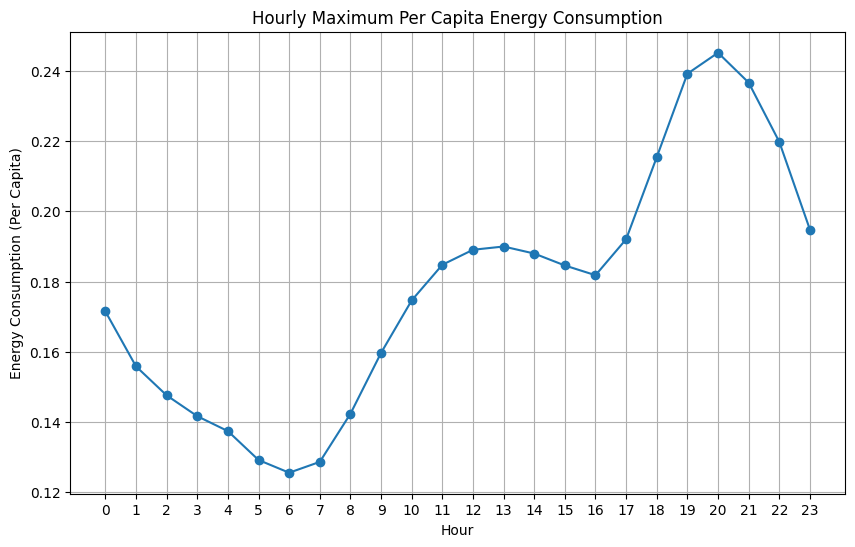

In [32]:
# Calculate the hourly maximum energy consumption for PerCapitaConsumption
hourly_max = df.groupby('Hour')['PerCapitaConsumption'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_max['Hour'], hourly_max['PerCapitaConsumption'], marker='o')
plt.title('Hourly Maximum Per Capita Energy Consumption')
plt.xlabel('Hour')
plt.ylabel('Energy Consumption (Per Capita)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


In [33]:
# Filter the data for hours 19, 20 and 21 only
filtered_hours = df[(df['Hour'] == 19) | (df['Hour'] == 20)| (df['Hour'] == 21)]

# Calculate the maximum energy consumption per month for hours 19, 20 and 21
monthly_max_for_hours = filtered_hours.groupby(['Month', 'Hour'])['PerCapitaConsumption'].mean().reset_index()

# Find the month with the highest consumption
max_19 = monthly_max_for_hours[monthly_max_for_hours['Hour'] == 19].sort_values(by='PerCapitaConsumption', ascending=False).iloc[0]
max_20 = monthly_max_for_hours[monthly_max_for_hours['Hour'] == 20].sort_values(by='PerCapitaConsumption', ascending=False).iloc[0]
max_21 = monthly_max_for_hours[monthly_max_for_hours['Hour'] == 21].sort_values(by='PerCapitaConsumption', ascending=False).iloc[0]

print("Highest consumption at 19:00:")
print(max_19)

print("\nHighest consumption at 20:00:")
print(max_20)

print("\nHighest consumption at 21:00:")
print(max_21)
# ممكن ينحذف

Highest consumption at 19:00:
Month                    8.000000
Hour                    19.000000
PerCapitaConsumption     0.281193
Name: 21, dtype: float64

Highest consumption at 20:00:
Month                    7.000000
Hour                    20.000000
PerCapitaConsumption     0.302878
Name: 19, dtype: float64

Highest consumption at 21:00:
Month                    7.000000
Hour                    21.000000
PerCapitaConsumption     0.295416
Name: 20, dtype: float64


In [34]:
# Filter the data for hours 4, 5, 6, and 7 only
filtered_hours = df[(df['Hour'] >= 4) & (df['Hour'] <= 7)]

# Calculate the minimum energy consumption per month for hours 4, 5, 6, and 7
monthly_min_for_hours = filtered_hours.groupby(['Month', 'Hour'])['PerCapitaConsumption'].min().reset_index()

# Find the month with the lowest consumption at 4:00, 5:00, 6:00, and 7:00
min_4 = monthly_min_for_hours[monthly_min_for_hours['Hour'] == 4].sort_values(by='PerCapitaConsumption', ascending=True).iloc[0]
min_5 = monthly_min_for_hours[monthly_min_for_hours['Hour'] == 5].sort_values(by='PerCapitaConsumption', ascending=True).iloc[0]
min_6 = monthly_min_for_hours[monthly_min_for_hours['Hour'] == 6].sort_values(by='PerCapitaConsumption', ascending=True).iloc[0]
min_7 = monthly_min_for_hours[monthly_min_for_hours['Hour'] == 7].sort_values(by='PerCapitaConsumption', ascending=True).iloc[0]

print("Lowest consumption at 4:00:")
print(min_4)

print("\nLowest consumption at 5:00:")
print(min_5)

print("\nLowest consumption at 6:00:")
print(min_6)

print("\nLowest consumption at 7:00:")
print(min_7)
# ممكن ينحذف

Lowest consumption at 4:00:
Month                   12.000000
Hour                     4.000000
PerCapitaConsumption     0.112238
Name: 44, dtype: float64

Lowest consumption at 5:00:
Month                   4.000000
Hour                    5.000000
PerCapitaConsumption    0.095654
Name: 13, dtype: float64

Lowest consumption at 6:00:
Month                   3.000000
Hour                    6.000000
PerCapitaConsumption    0.093633
Name: 10, dtype: float64

Lowest consumption at 7:00:
Month                   12.000000
Hour                     7.000000
PerCapitaConsumption     0.092005
Name: 47, dtype: float64


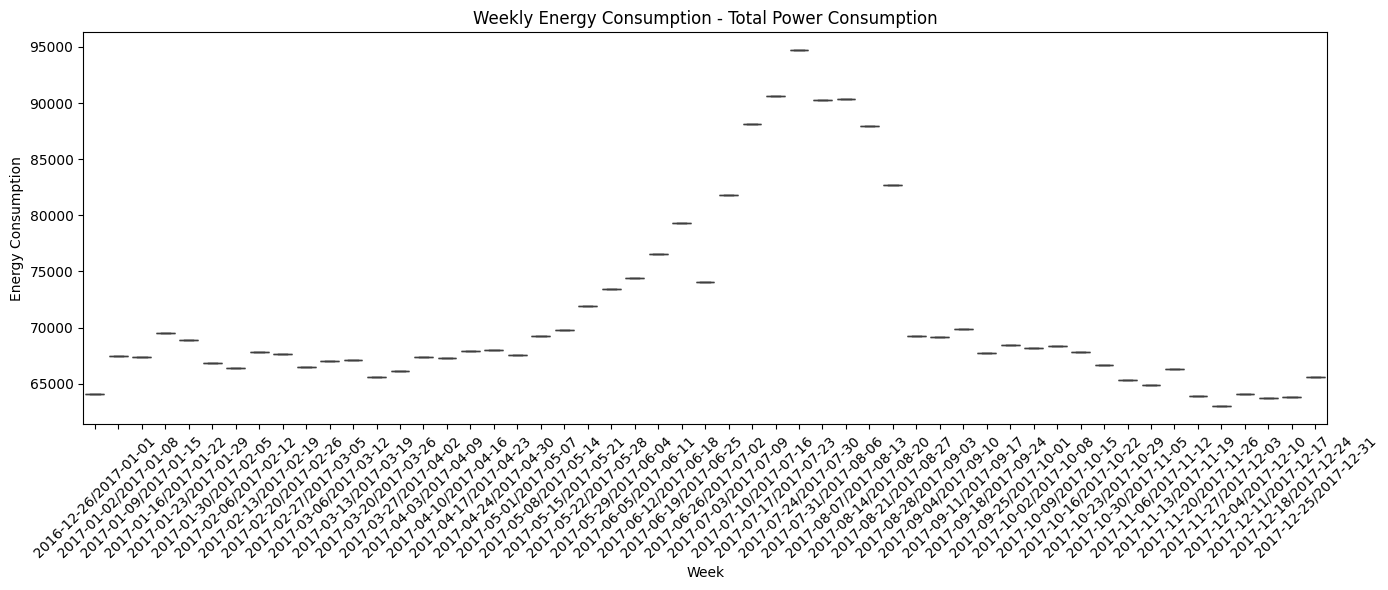

In [35]:

# Convert the date index to weekly periods
df['Week'] = df.index.to_period('W')  # Ensure that 'index' is the datetime column

# Group data by week and calculate the mean for TotalPowerConsumption
weekly_data = df.groupby('Week')['TotalPowerConsumption'].mean().reset_index()

# Plotting the Time Series Box Plot for TotalPowerConsumption
plt.figure(figsize=(14, 6))
sns.boxplot(x='Week', y='TotalPowerConsumption', data=weekly_data)
plt.title('Weekly Energy Consumption - Total Power Consumption')
plt.xlabel('Week')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# ممكن ينحذف

In [49]:
import plotly.express as px

# Convert the date index to weekly periods
df['Week'] = df.index.to_period('W')

# Group data by week and calculate the mean for TotalPowerConsumption
weekly_data = df.groupby('Week')['TotalPowerConsumption'].mean().reset_index()

# Convert the Week column to show only the start date of the week in a shorter format
weekly_data['Week'] = weekly_data['Week'].apply(lambda x: x.start_time.strftime('%b %d'))  # Example: 'Jan 01'

# Create the interactive box plot using Plotly
fig = px.box(weekly_data, x='Week', y='TotalPowerConsumption', title='Weekly Energy Consumption - Interactive Box Plot',
             labels={'TotalPowerConsumption': 'Energy Consumption', 'Week': 'Week'},
             points="all")  # Include all points for outliers

# Customize the x-axis and layout for better readability
fig.update_xaxes(type='category', tickangle=45)
fig.update_layout(showlegend=False)

fig.show()


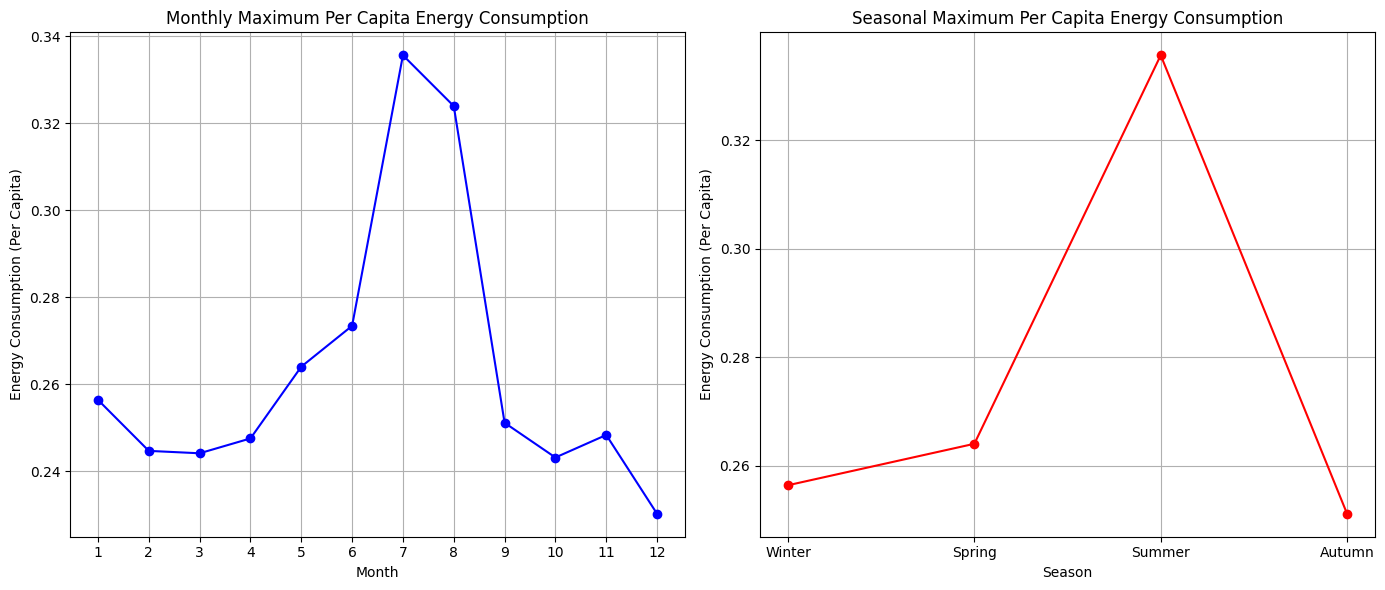

In [36]:
# Monthly maximum energy consumption for PerCapitaConsumption
monthly_max = df.groupby('Month')['PerCapitaConsumption'].max().reset_index()

# Create a 'Season' column based on the season one-hot encoded columns
# Ensure the seasonal columns are one-hot encoded (0 or 1) before summing
df['Season'] = df[['Season_Winter', 'Season_Spring', 'Season_Summer', 'Season_Autumn']].idxmax(axis=1).str.replace('Season_', '')

# Seasonal maximum energy consumption for PerCapitaConsumption
seasonal_max = df.groupby('Season')['PerCapitaConsumption'].max().reset_index()

# To display seasons in order
seasonal_max['Season'] = pd.Categorical(seasonal_max['Season'], categories=['Winter', 'Spring', 'Summer', 'Autumn'], ordered=True)
seasonal_max = seasonal_max.sort_values('Season')

# Create a subplot figure with 1 row and 2 columns
plt.figure(figsize=(14, 6))

# Plot for monthly maximum energy consumption
plt.subplot(1, 2, 1)
plt.plot(monthly_max['Month'], monthly_max['PerCapitaConsumption'], marker='o', linestyle='-', color='b')
plt.title('Monthly Maximum Per Capita Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (Per Capita)')
plt.grid(True)
plt.xticks(range(1, 13))

# Plot for seasonal maximum energy consumption
plt.subplot(1, 2, 2)
plt.plot(seasonal_max['Season'], seasonal_max['PerCapitaConsumption'], marker='o', linestyle='-', color='r')
plt.title('Seasonal Maximum Per Capita Energy Consumption')
plt.xlabel('Season')
plt.ylabel('Energy Consumption (Per Capita)')
plt.grid(True)

plt.tight_layout()
plt.show()


### Dropping encoded columns


In [ ]:
df = df.drop(columns = ['TotalPowerConsumption', 'Weekday'])

# Scaling

In [37]:
df.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'Date', 'TotalPowerConsumption', 'IsHoliday', 'Year',
       'Month', 'Day', 'Hour', 'Weekday', 'IsWeekend', 'Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter',
       'TimeOfDay_Afternoon', 'TimeOfDay_Evening', 'TimeOfDay_Morning',
       'TimeOfDay_Night', 'PerCapitaConsumption', 'Week', 'Season'],
      dtype='object')

In [38]:
df_lagged.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'TotalPowerConsumption', 'IsHoliday', 'Year', 'Month',
       'Day', 'Hour', 'Weekday', 'IsWeekend', 'Season_Autumn', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'TimeOfDay_Afternoon',
       'TimeOfDay_Evening', 'TimeOfDay_Morning', 'TimeOfDay_Night',
       'PerCapitaConsumption', 'Temperature_lag4', 'Temperature_lag8',
       'Temperature_lag12', 'Temperature_lag24', 'Temperature_lag48',
       'Humidity_lag4', 'Humidity_lag8', 'Humidity_lag12', 'Humidity_lag24',
       'Humidity_lag48', 'WindSpeed_lag4', 'WindSpeed_lag8', 'WindSpeed_lag12',
       'WindSpeed_lag24', 'WindSpeed_lag48', 'GeneralDiffuseFlows_lag4',
       'GeneralDiffuseFlows_lag8', 'GeneralDiffuseFlows_lag12',
       'GeneralDiffuseFlows_lag24', 'GeneralDiffuseFlows_lag48',
       'DiffuseFlows_lag4', 'DiffuseFlows_lag8', 'DiffuseFlows_lag12',
       'DiffuseFlows_lag24', 'DiffuseFlows_lag48', 'PerCapitaConsumpt

In [39]:
from sklearn.preprocessing import MinMaxScaler

# List of columns to scale
cols_to_scale = [
    "Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows",
    "DiffuseFlows", "PerCapitaConsumption",
    "Temperature_lag4", "Temperature_lag8", "Temperature_lag12", "Temperature_lag24", "Temperature_lag48",
    "Humidity_lag4", "Humidity_lag8", "Humidity_lag12", "Humidity_lag24", "Humidity_lag48",
    "WindSpeed_lag4", "WindSpeed_lag8", "WindSpeed_lag12", "WindSpeed_lag24", "WindSpeed_lag48",
    "GeneralDiffuseFlows_lag4", "GeneralDiffuseFlows_lag8", "GeneralDiffuseFlows_lag12", "GeneralDiffuseFlows_lag24", "GeneralDiffuseFlows_lag48",
    "DiffuseFlows_lag4", "DiffuseFlows_lag8", "DiffuseFlows_lag12", "DiffuseFlows_lag24", "DiffuseFlows_lag48",
    "PerCapitaConsumption_lag4", "PerCapitaConsumption_lag8", "PerCapitaConsumption_lag12", "PerCapitaConsumption_lag24", "PerCapitaConsumption_lag48"
]

# MinMaxScaler
scaler = MinMaxScaler()
df_lagged[cols_to_scale] = scaler.fit_transform(df_lagged[cols_to_scale])
pd.set_option('display.max_columns', None)
df_lagged.head()


,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,TotalPowerConsumption,IsHoliday,Year,Month,Day,Hour,Weekday,IsWeekend,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,TimeOfDay_Afternoon,TimeOfDay_Evening,TimeOfDay_Morning,TimeOfDay_Night,PerCapitaConsumption,Temperature_lag4,Temperature_lag8,Temperature_lag12,Temperature_lag24,Temperature_lag48,Humidity_lag4,Humidity_lag8,Humidity_lag12,Humidity_lag24,Humidity_lag48,WindSpeed_lag4,WindSpeed_lag8,WindSpeed_lag12,WindSpeed_lag24,WindSpeed_lag48,GeneralDiffuseFlows_lag4,GeneralDiffuseFlows_lag8,GeneralDiffuseFlows_lag12,GeneralDiffuseFlows_lag24,GeneralDiffuseFlows_lag48,DiffuseFlows_lag4,DiffuseFlows_lag8,DiffuseFlows_lag12,DiffuseFlows_lag24,DiffuseFlows_lag48,PerCapitaConsumption_lag4,PerCapitaConsumption_lag8,PerCapitaConsumption_lag12,PerCapitaConsumption_lag24,PerCapitaConsumption_lag48
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03 00:00:00,0.228240,0.765765,0.003430,0.000059,0.000117,59671.767438,0.0,2017.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.232591,0.271785,0.322395,0.320456,0.195731,0.071889,0.681802,0.585731,0.553571,0.796238,0.760076,0.003487,0.003629,0.003629,0.003742,0.004621,0.000042,0.236589,0.494125,0.000049,0.000047,0.000067,0.261561,0.050173,0.000117,0.000068,0.586216,0.308995,0.316796,0.227621,0.303683
2017-01-03 01:00:00,0.236321,0.729603,0.003714,0.000043,0.000129,53044.344748,0.0,2017.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.163355,0.263843,0.314869,0.324289,0.196747,0.053935,0.661283,0.596437,0.567995,0.807005,0.790752,0.003515,0.003856,0.003685,0.003657,0.004649,0.000040,0.090750,0.507674,0.000055,0.000040,0.000061,0.125015,0.051065,0.000115,0.000084,0.552963,0.486198,0.319639,0.157695,0.212813
2017-01-03 02:00:00,0.226809,0.745653,0.003770,0.000052,0.000124,49677.844478,0.0,2017.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.128186,0.256962,0.293812,0.331400,0.205844,0.040234,0.682167,0.645803,0.527507,0.780595,0.807208,0.003402,0.003629,0.003572,0.003941,0.004706,0.000061,0.003779,0.466729,0.000052,0.000046,0.000087,0.004225,0.049071,0.000125,0.000104,0.468144,0.593755,0.309651,0.120556,0.153384
2017-01-03 03:00:00,0.238399,0.746262,0.003657,0.000056,0.000135,47929.504327,0.0,2017.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.109921,0.245787,0.274879,0.328953,0.193007,0.038849,0.719243,0.694600,0.543068,0.811271,0.784658,0.003430,0.003544,0.003544,0.003884,0.004791,0.000042,0.000040,0.370278,0.000052,0.000043,0.000096,0.000071,0.074909,0.000120,0.000117,0.344949,0.590186,0.307243,0.103953,0.120211
2017-01-03 04:00:00,0.217250,0.775719,0.004224,0.000053,0.000128,47335.744527,0.0,2017.0,1.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.103718,0.228240,0.271785,0.322395,0.184279,0.041435,0.765765,0.681802,0.585731,0.843775,0.747684,0.003430,0.003487,0.003629,0.003657,0.004706,0.000059,0.000042,0.236589,0.000060,0.000041,0.000117,0.000067,0.261561,0.000116,0.000096,0.232591,0.586216,0.308995,0.099378,0.107677


# K-Means


## Step 1: Determine the Number of Clusters

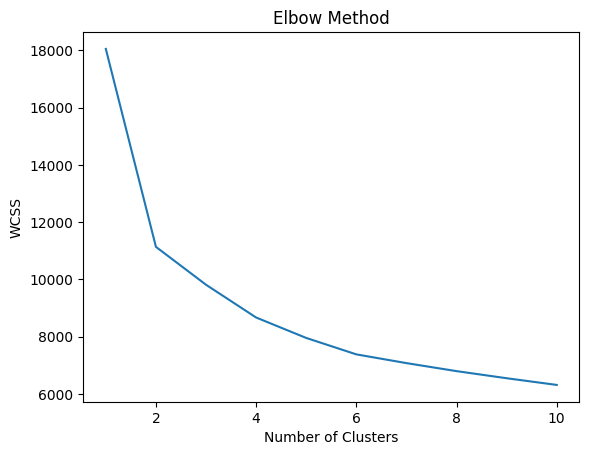

In [40]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=20, random_state=np.random.randint(0, 100))
    kmeans.fit(df_lagged[cols_to_scale])
    wcss.append(kmeans.inertia_)

# Plot the results of the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### silhouette_score is a good indicator to help you make a final decision is between 4 and 5.

In [41]:
from sklearn.metrics import silhouette_score


# For 2 clusters
kmeans_2 = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=20, random_state=42)
kmeans_2.fit(df_lagged[cols_to_scale])
score_2 = silhouette_score(df_lagged[cols_to_scale], kmeans_2.labels_)
print(f'Silhouette Score for 2 clusters: {score_2}')


# For 3 clusters
kmeans_3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=20, random_state=42)
kmeans_3.fit(df_lagged[cols_to_scale])
score_3 = silhouette_score(df_lagged[cols_to_scale], kmeans_3.labels_)
print(f'Silhouette Score for 3 clusters: {score_3}')

# For 4 clusters
kmeans_4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=20, random_state=42)
kmeans_4.fit(df_lagged[cols_to_scale])
score_4 = silhouette_score(df_lagged[cols_to_scale], kmeans_4.labels_)
print(f'Silhouette Score for 4 clusters: {score_4}')

# For 5 clusters
kmeans_5 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=20, random_state=42)
kmeans_5.fit(df_lagged[cols_to_scale])
score_5 = silhouette_score(df_lagged[cols_to_scale], kmeans_5.labels_)
print(f'Silhouette Score for 5 clusters: {score_5}')


Silhouette Score for 2 clusters: 0.366692600059628
Silhouette Score for 3 clusters: 0.24419486346391797
Silhouette Score for 4 clusters: 0.22062838128091067
Silhouette Score for 5 clusters: 0.2084356792191872


In [42]:
# Using 2 clusters as an example
optimal_clusters = 2

# Create the KMeans model with the chosen number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=20, random_state=42)
kmeans_optimal.fit(df_lagged[cols_to_scale])

# Add the cluster labels to the DataFrame
df_lagged['Cluster'] = kmeans_optimal.labels_

# Display the first few rows with the cluster labels
print(df_lagged.head())


                     Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
Datetime                                                                     
2017-01-03 00:00:00     0.228240  0.765765   0.003430             0.000059   
2017-01-03 01:00:00     0.236321  0.729603   0.003714             0.000043   
2017-01-03 02:00:00     0.226809  0.745653   0.003770             0.000052   
2017-01-03 03:00:00     0.238399  0.746262   0.003657             0.000056   
2017-01-03 04:00:00     0.217250  0.775719   0.004224             0.000053   

                     DiffuseFlows  TotalPowerConsumption  IsHoliday    Year  \
Datetime                                                                      
2017-01-03 00:00:00      0.000117           59671.767438        0.0  2017.0   
2017-01-03 01:00:00      0.000129           53044.344748        0.0  2017.0   
2017-01-03 02:00:00      0.000124           49677.844478        0.0  2017.0   
2017-01-03 03:00:00      0.000135           47929.504327  

## Step 2: Apply the K-means Algorithm

In [43]:
# Apply the K-means algorithm
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_lagged['Cluster'] = kmeans.fit_predict(df_lagged[cols_to_scale])

# Add the clusters to the original DataFrame
df_lagged['Cluster'] = kmeans.labels_

## Step 3: Analyze and Visualize the Results

         Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  DiffuseFlows  \
Cluster                                                                        
0           0.441281  0.580843   0.066317             0.464238      0.233419   
1           0.320135  0.751712   0.036678             0.022780      0.019741   
2           0.524447  0.647844   0.784482             0.228042      0.081473   

         TotalPowerConsumption  IsHoliday    Year     Month        Day  \
Cluster                                                                  
0                 70411.965839   0.026082  2017.0  5.982242  14.740289   
1                 66702.417846   0.025556  2017.0  6.153056  14.658611   
2                 76708.578517   0.067255  2017.0  7.273585  17.517651   

              Hour   Weekday  IsWeekend  Season_Autumn  Season_Spring  \
Cluster                                                                 
0        13.171476  2.925083   0.272475       0.214761       0.352386   
1        

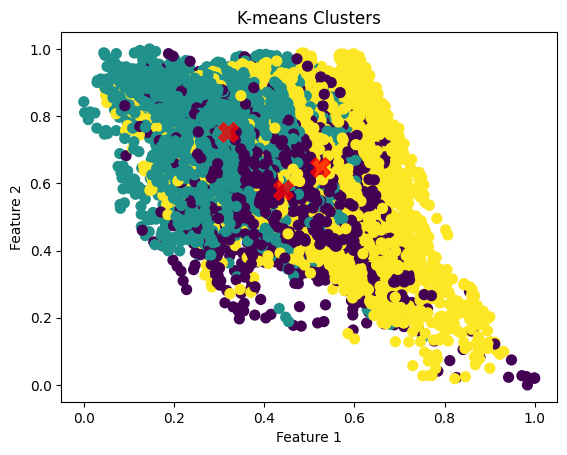

In [44]:
# Calculate the mean values for each cluster
cluster_means = df_lagged.groupby('Cluster').mean()
print(cluster_means)

# Visualize the clusters
plt.scatter(df_lagged[cols_to_scale].iloc[:, 0], df_lagged[cols_to_scale].iloc[:, 1], c=df_lagged['Cluster'], s=50, cmap='viridis')

# Also visualize the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-means Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()